In [1]:
#import Library of python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import statistics
import warnings
import seaborn as sns
import random as rd
import sys
sys.path.append('../scripts')
from filehandle import ReadData
from plootter import Plotter

Read data from dvc

In [2]:
reader = ReadData()
# The load the raw sales data
#train_df = reader.dvc_get_data(path="data/nb.csv", version="v-1")
data1=pd.read_csv("../data/nb.csv")
# Finally load the test data
#test_df =reader.dvc_get_data(path="data/driver_locations.csv", version="v-2")
data2=pd.read_csv("../data/driver_locations.csv")

In [3]:
data1.head()

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36


In [4]:
data2.head()

,id,order_id,driver_id,driver_action,lat,lng,created_at,updated_at
0,1,392001,243828,accepted,6.602207,3.270465,NaN,NaN
1,2,392001,243588,rejected,6.592097,3.287445,NaN,NaN
2,3,392001,243830,rejected,6.596133,3.281784,NaN,NaN
3,4,392001,243539,rejected,6.596142,3.280526,NaN,NaN
4,5,392001,171653,rejected,6.609232,3.288800,NaN,NaN


In [5]:
train_df = data2.merge(data1, how='inner', left_on='order_id',right_on="Trip ID")
train_df.head()

,id,order_id,driver_id,driver_action,lat,lng,created_at,updated_at,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time
0,1,392001,243828,accepted,6.602207,3.270465,NaN,NaN,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36
1,2,392001,243588,rejected,6.592097,3.287445,NaN,NaN,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36
2,3,392001,243830,rejected,6.596133,3.281784,NaN,NaN,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36
3,4,392001,243539,rejected,6.596142,3.280526,NaN,NaN,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36
4,5,392001,171653,rejected,6.609232,3.288800,NaN,NaN,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36


In [6]:
train_df.info

<bound method DataFrame.info of               id  order_id  driver_id driver_action       lat       lng  \
0              1    392001     243828      accepted  6.602207  3.270465   
1              2    392001     243588      rejected  6.592097  3.287445   
2              3    392001     243830      rejected  6.596133  3.281784   
3              4    392001     243539      rejected  6.596142  3.280526   
4              5    392001     171653      rejected  6.609232  3.288800   
...          ...       ...        ...           ...       ...       ...   
1557735  1557736    517948     243774      rejected  6.469036  3.566877   
1557736  1557737    517948     245447      rejected  6.425431  3.527358   
1557737  1557738    517948     239866      rejected  6.440013  3.525378   
1557738  1557739    517948     243774      rejected  6.469036  3.566877   
1557739  1557740    517948     244170      rejected  6.469390  3.572079   

         created_at  updated_at  Trip ID                  Trip Orig

In [7]:
train_df.columns

Index(['id', 'order_id', 'driver_id', 'driver_action', 'lat', 'lng',
       'created_at', 'updated_at', 'Trip ID', 'Trip Origin',
       'Trip Destination', 'Trip Start Time', 'Trip End Time'],
      dtype='object')

In [8]:
columns = ['created_at', 'updated_at']
train_df.drop(columns, inplace=True, axis=1)

In [9]:
train_df.isnull().sum()

id                     0
order_id               0
driver_id              0
driver_action          0
lat                    0
lng                    0
Trip ID                0
Trip Origin            0
Trip Destination       0
Trip Start Time     2022
Trip End Time          0
dtype: int64

Exploratory Data Analysis

2022-10-20 21:18:14,853:file_log:successfully displayed histogram plot


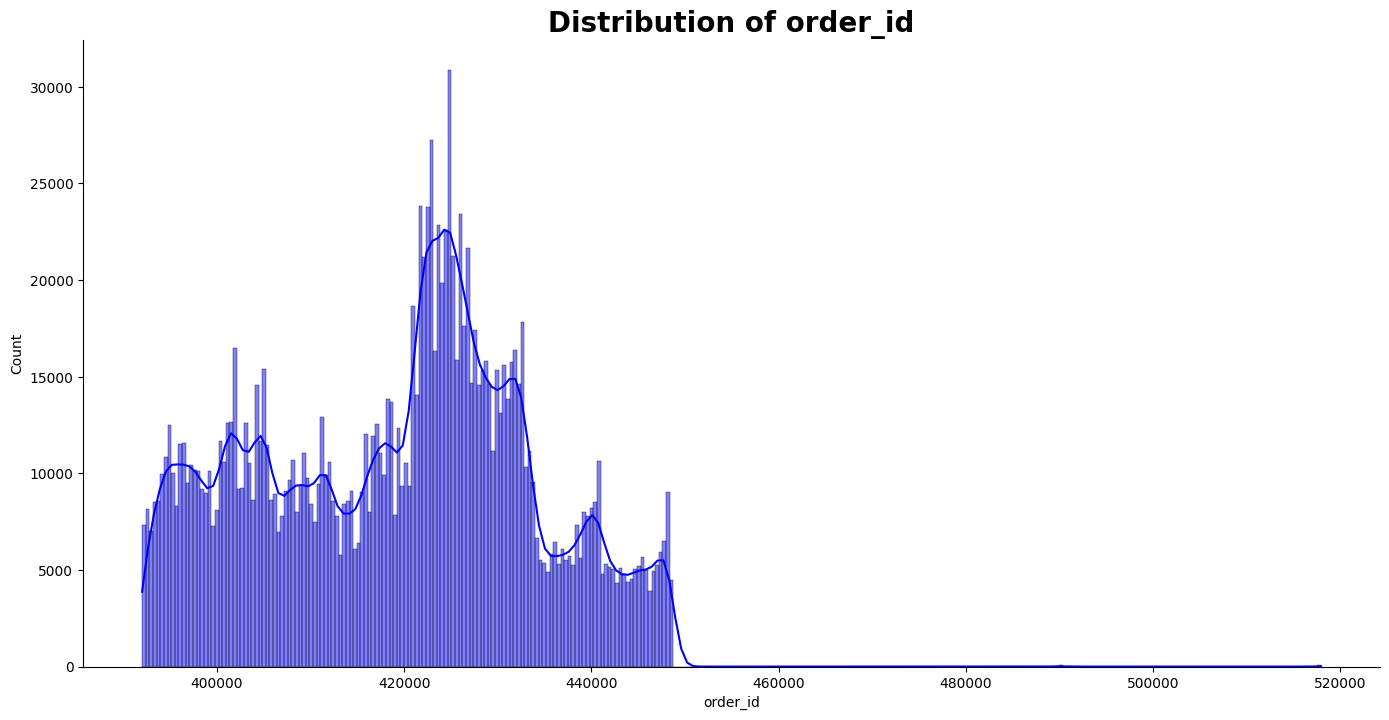

In [10]:
plotter=Plotter()
# Distribution of Sales on the train data
plot  = plotter.plot_hist(train_df, 'order_id', 'blue')
plot.savefig('../screen_shoots/distributionoforder_id.png')

In [11]:
plt.style.use('ggplot')
import pandas_profiling
pandas_profiling.ProfileReport(train_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
# separate latitide and longitide from the same column 
train_df['Trip_Origin_lat'] = train_df['Trip Origin'].apply(lambda x: str(x).split(',')[0])
train_df['Trip_Origin_lng'] = train_df['Trip Origin'].apply(lambda x: str(x).split(',')[1])

In [12]:
# separate latitide and longitide from the same column 
train_df['Trip_Destination_lat'] = train_df['Trip Destination'].apply(lambda x: str(x).split(',')[0])
train_df['Trip_Destination_lng'] = train_df['Trip Destination'].apply(lambda x: str(x).split(',')[1])

In [13]:
from geopy import distance

#let's find the distance between origin and destination
train_df['distance']=train_df.apply(lambda x:distance.distance((x["Trip_Origin_lat"],x["Trip_Origin_lng"]), 
(x["Trip_Destination_lat"],x["Trip_Destination_lng"])).km,axis=1)

In [ ]:
#let's check the pattern of 'distance between origin and destination'
plt.rcParams['figure.figsize']=15,5
plt.subplot(122)
sns.distplot(train_df['distance'], color='blue')

plt.suptitle('Distance')
plt.show()